<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.758281,37.994628,42.525656,0.147367,177.425932,177.312731,0.113200
1,0.0,1.0,88.740109,87.620764,44.170535,-0.099377,230.432030,230.513960,-0.081930
2,0.0,2.0,93.829791,45.911467,69.191808,0.022115,218.955180,218.963594,-0.008414
3,0.0,3.0,48.475919,34.301840,58.512880,0.175965,151.466604,151.301464,0.165139
4,0.0,4.0,44.803305,94.481905,68.919603,-0.009343,218.195470,218.148673,0.046796
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.858106,44.302104,86.401044,-0.246307,218.314947,218.532065,-0.217118
19996,999.0,16.0,66.754087,55.153533,22.446626,-0.143980,154.210266,154.327765,-0.117499
19997,999.0,17.0,58.259494,31.531019,40.081086,0.174260,140.045859,139.802804,0.243055
19998,999.0,18.0,62.084504,93.688023,66.031444,0.104318,231.908290,231.871180,0.037110


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.758281,37.994628,42.525656,0.147367,177.425932,177.312731,0.113200
1,0.0,1.0,88.740109,87.620764,44.170535,-0.099377,230.432030,230.513960,-0.081930
2,0.0,2.0,93.829791,45.911467,69.191808,0.022115,218.955180,218.963594,-0.008414
3,0.0,3.0,48.475919,34.301840,58.512880,0.175965,151.466604,151.301464,0.165139
4,0.0,4.0,44.803305,94.481905,68.919603,-0.009343,218.195470,218.148673,0.046796
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.858106,44.302104,86.401044,-0.246307,218.314947,218.532065,-0.217118
19996,999.0,16.0,66.754087,55.153533,22.446626,-0.143980,154.210266,154.327765,-0.117499
19997,999.0,17.0,58.259494,31.531019,40.081086,0.174260,140.045859,139.802804,0.243055
19998,999.0,18.0,62.084504,93.688023,66.031444,0.104318,231.908290,231.871180,0.037110


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    86.758281  37.994628  42.525656  ...  177.425932  177.312731  0.113200
      1.0    88.740109  87.620764  44.170535  ...  230.432030  230.513960 -0.081930
      2.0    93.829791  45.911467  69.191808  ...  218.955180  218.963594 -0.008414
      3.0    48.475919  34.301840  58.512880  ...  151.466604  151.301464  0.165139
      4.0    44.803305  94.481905  68.919603  ...  218.195470  218.148673  0.046796
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   77.858106  44.302104  86.401044  ...  218.314947  218.532065 -0.217118
      16.0   66.754087  55.153533  22.446626  ...  154.210266  154.327765 -0.117499
      17.0   58.259494  31.531019  40.081086  ...  140.045859  139.802804  0.243055
      18.0   62.084504  93.688023  66.031444  ...  231.908290  231.871180  0.037110
      19.0   27.236187  39.564189  25.076032  ...  101.694027  101.821788 -0.127761

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    86.758281  37.994628  42.525656  ...  177.425932  177.312731  0.113200
      1.0    88.740109  87.620764  44.170535  ...  230.432030  230.513960 -0.081930
      2.0    93.829791  45.911467  69.191808  ...  218.955180  218.963594 -0.008414
      3.0    48.475919  34.301840  58.512880  ...  151.466604  151.301464  0.165139
      4.0    44.803305  94.481905  68.919603  ...  218.195470  218.148673  0.046796
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   77.858106  44.302104  86.401044  ...  218.314947  218.532065 -0.217118
      16.0   66.754087  55.153533  22.446626  ...  154.210266  154.327765 -0.117499
      17.0   58.259494  31.531019  40.081086  ...  140.045859  139.802804  0.243055
      18.0   62.084504  93.688023  66.031444  ...  231.908290  231.871180  0.037110
      19.0   27.236187  39.564189  25.076032  ...  101.694027  101.821788 -0.127761

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.758281,37.994628,42.525656,0.147367,177.425932,177.312731,0.113200
1,0.0,1.0,88.740109,87.620764,44.170535,-0.099377,230.432030,230.513960,-0.081930
2,0.0,2.0,93.829791,45.911467,69.191808,0.022115,218.955180,218.963594,-0.008414
3,0.0,3.0,48.475919,34.301840,58.512880,0.175965,151.466604,151.301464,0.165139
4,0.0,4.0,44.803305,94.481905,68.919603,-0.009343,218.195470,218.148673,0.046796
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.858106,44.302104,86.401044,-0.246307,218.314947,218.532065,-0.217118
19996,999.0,16.0,66.754087,55.153533,22.446626,-0.143980,154.210266,154.327765,-0.117499
19997,999.0,17.0,58.259494,31.531019,40.081086,0.174260,140.045859,139.802804,0.243055
19998,999.0,18.0,62.084504,93.688023,66.031444,0.104318,231.908290,231.871180,0.037110


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    86.758281  37.994628  42.525656  ...  177.425932  177.312731  0.113200
      1.0    88.740109  87.620764  44.170535  ...  230.432030  230.513960 -0.081930
      2.0    93.829791  45.911467  69.191808  ...  218.955180  218.963594 -0.008414
      3.0    48.475919  34.301840  58.512880  ...  151.466604  151.301464  0.165139
      4.0    44.803305  94.481905  68.919603  ...  218.195470  218.148673  0.046796
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   77.858106  44.302104  86.401044  ...  218.314947  218.532065 -0.217118
      16.0   66.754087  55.153533  22.446626  ...  154.210266  154.327765 -0.117499
      17.0   58.259494  31.531019  40.081086  ...  140.045859  139.802804  0.243055
      18.0   62.084504  93.688023  66.031444  ...  231.908290  231.871180  0.037110
      19.0   27.236187  39.564189  25.076032  ...  101.694027  101.821788 -0.127761

[20000 rows x 7 columns]

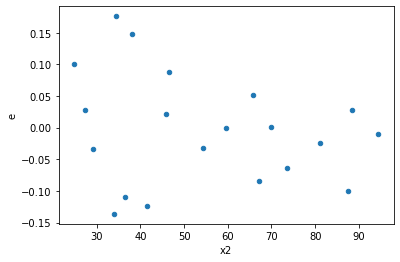

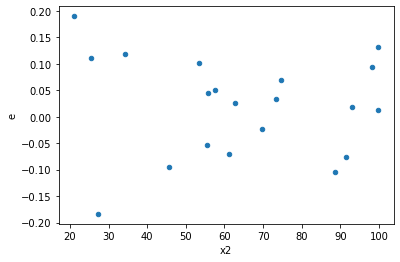

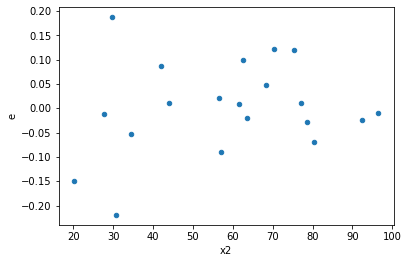

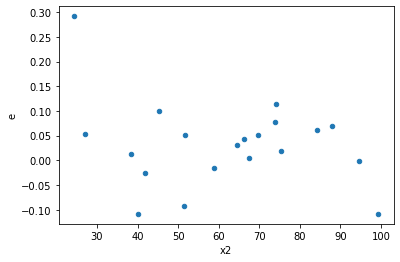

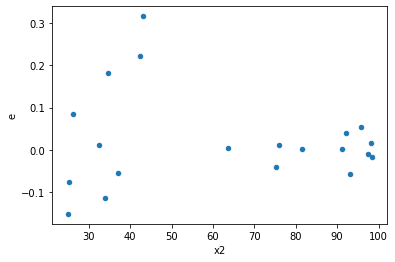

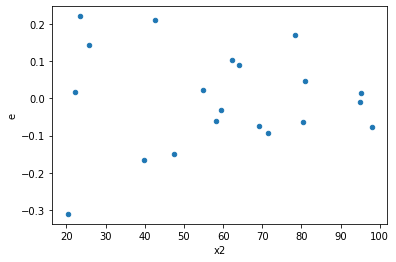

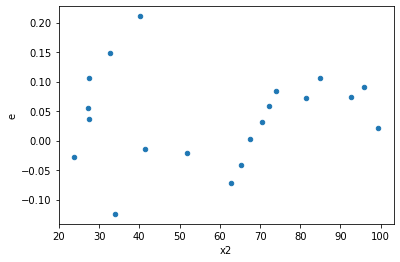

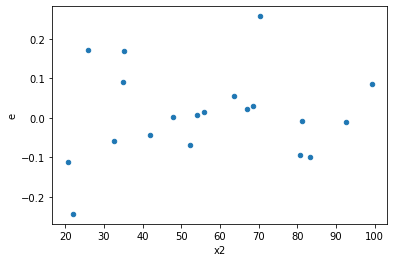

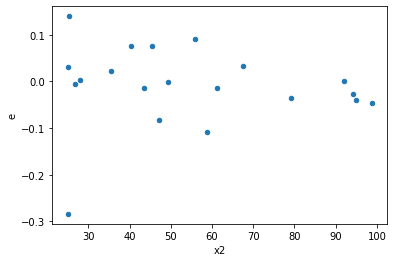

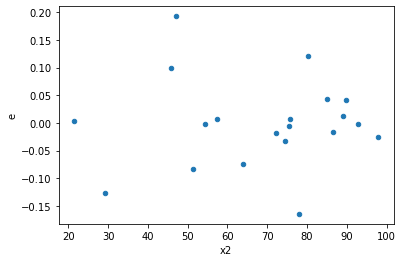

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,5.0,5.0,0.01014402682885916,0.047918920837079944,0.002028805365771832,0.009583784167415989,4.723855885391926,0.11357102302265765,0.9432144884886712,0.05678551151132882,Reject001=1 : Homoscedasticity
16.0,5.0,5.0,0.047979684042751394,0.05635776240328242,0.009595936808550278,0.011271552480656484,1.1746172057545419,0.8641210896221652,0.5679394551889174,0.4320605448110826,Reject001=1 : Homoscedasticity
20.0,5.0,5.0,0.003939519357672723,0.028798719410650403,0.0007879038715345446,0.00575974388213008,7.310211423269485,0.04770667745667634,0.9761466612716618,0.02385333872833817,Reject001=1 : Homoscedasticity
30.0,5.0,5.0,0.01869526611079177,0.0344793943566253,0.003739053222158354,0.00689587887132506,1.8442847591627596,0.5179804729879143,0.7410097635060429,0.25899023649395714,Reject001=1 : Homoscedasticity
41.0,5.0,5.0,0.002128858761025188,0.027031286012979445,0.00042577175220503765,0.005406257202595889,12.697547863608419,0.014440325759288442,0.9927798371203558,0.007220162879644221,Reject001=1 : Homoscedasticity
69.0,5.0,5.0,0.014548455850851509,0.016549745748045814,0.0029096911701703017,0.0033099491496091627,1.1375602962755096,0.890975547844481,0.5545122260777595,0.4454877739222405,Reject001=1 : Homoscedasticity
70.0,5.0,5.0,0.03512729822901686,0.04322892626917612,0.007025459645803372,0.008645785253835223,1.2306362415731398,0.8254082315422622,0.5872958842288689,0.4127041157711311,Reject001=1 : Homoscedasticity
78.0,5.0,5.0,0.025551307414928854,0.046423007661873114,0.005110261482985771,0.009284601532374624,1.8168544923360581,0.528136495401295,0.7359317522993525,0.2640682477006475,Reject001=1 : Homoscedasticity
79.0,5.0,5.0,0.020090252536941813,0.043176913219245674,0.004018050507388363,0.008635382643849134,2.149147360883208,0.42092105665775725,0.7895394716711214,0.21046052832887863,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.08470524671828868,0.018095712095331236,0.016941049343657734,0.003619142419066247,0.21363153755414538,0.11554171816332524,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.07606719222584077,0.012756591203106661,0.015213438445168153,0.0025513182406213322,0.16770161787006413,0.07223068458886457,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.06538576127644388,0.015156681020127549,0.013077152255288776,0.00303133620402551,0.2318040002019209,0.13452035005081633,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.06953746095680291,0.010469363928738352,0.013907492191360582,0.0020938727857476706,0.15055717860107065,0.058108498719698184,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,0.07211065224697366,0.007784570801865892,0.014422130449394732,0.0015569141603731782,0.10795313257193002,0.028900239247904223,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,0.01014402682885916,0.047918920837079944,0.002028805365771832,0.009583784167415989,4.723855885391926,0.11357102302265765,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.03720353650635337,0.002823772081034415,0.007440707301270675,0.000564754416206883,0.07590063596648103,0.013291392727254785,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.09879684479913094,0.027112002631904504,0.019759368959826187,0.005422400526380901,0.2744217458262695,0.18216758561153726,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,0.03975077249877043,0.008294554090283556,0.007950154499754086,0.0016589108180567111,0.2086639722672087,0.11051832773753585,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      941
Reject001=0 : Heteroscedasticity     59
Name: Result_test, dtype: int64